# Mohsen Qaysi - 12254676

# Import all requred libraries or make sure they are installed in your machine
##### Tweepy library is a Twitter Warper used to simplify the calls to Twitter API
###### Make sure you have 'textblob' installed
- pip install textblob for mac and nltk
- python -m textblob.download_corpora

In [ ]:
import datetime as date
import errno
import json
import locale
import os
import re
import time
import tweepy
import pandas as pd
import numpy as np      # For number computing
from tweepy import OAuthHandler
from collections import OrderedDict
import itertools
from textblob import TextBlob
import vincent

# Task 1: Identify one or more suitable web APIs
#### API Chosen:
A single API that was chosen for this assignment which is the Twitter API 
Data  will be collected based on searched tweets using the API. 
https://developer.twitter.com/en/docs/api-reference-index
###### The API is requres two keys and two tokens to work:
```python
consumer_key = "DUE3dfu56GG5layWupqs9MOMx"
consumer_secret = "uBLozGejSbs0J7zKaBwnd8Gyp9G11TQNP8PCFvHKiCKyD6fxPV"
# -------------------------------------------------------------------
access_token = "234579885-lc0ETaZdS06IS2KXV1wJWsFW8yA94DTTQusrNCT2"
access_token_secret = "hlDpkTV6iIxZDd8sW7JFOWnarFdUqW8cQ9TtUszGqLMnS"
```
The API rate limit window duration is 15 minutes when your calls get blocked.

# Task 2: Collect data your chosen API(s)
##### Collecting Data - Functions needed:
The following 4 functions were written to allow us to search - with key words, save data to a file, and reload the data back for anaylsis
calls of the API as only limited data is available per call.

In [2]:
"""Access keys and tokens for our Twitter App"""
consumer_key = "DUE3dfu56GG5layWupqs9MOMx"
consumer_secret = "uBLozGejSbs0J7zKaBwnd8Gyp9G11TQNP8PCFvHKiCKyD6fxPV"
access_token = "234579885-lc0ETaZdS06IS2KXV1wJWsFW8yA94DTTQusrNCT2"
access_token_secret = "hlDpkTV6iIxZDd8sW7JFOWnarFdUqW8cQ9TtUszGqLMnS"
""" Authanticate the app in order to access the tweets """
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


def write_tweets(tweets):
    """
    Function that appends tweets to a file.
    The attribute _json (with a leading underscore), which is not the raw JSON string, but a dictionary.
    """
    try:
        """ 
        If file exists load its data and add the new tweets to it
        """
        if os.path.exists(file_name):
             with open(file_name, 'r') as f:
                temp = json.load(f)
                """
                remove the old file and create a new one which contains updated data
                """
                os.remove(file_name)
                """
                create a new file and add the data to it.
                """
                with open(file_name, 'a') as f:
                    for tweet in tweets:
                        temp.append(tweet)
                    json.dump(temp, f, indent=4)
                    f.close()
                    print('Done saving data to the file')
                    return True
        else:
             with open(file_name, 'a') as f:
                json.dump(tweets, f, indent=4)
                f.close()
                print('Done saving data to the file')
                return True

    except BaseException as error:
        print("Error save_data: ", str(error))
        time.sleep(5)


# This will return a formatted data with -n to get older dates
def get_older_date(n=0):
    # YYYY-MM-DD - n => minus n-days
    return f"{date.datetime.now().year:d}-{date.datetime.now().month:d}-{date.datetime.now().day - n:d}"
# retrun a data in the follwoing format <YYYY-MM-DD>
def format_date(formate_data):
    return f"{formate_data.year:d}-{formate_data.month:d}-{formate_data.day:d}"

# load tweets using the N of key word(s) with a limit_q_size => # of tweets given back
"""
 - api.search ... tell the api that you want to search for tweets which allows us to access up to 
one week old tweets.
- q= ... takes in a list of key word(s)
- since and until ... are the dates limit ex: 2018-03-10 to 2018-03-16 etc up to one week
lang ... is the tweets language you are searching for.
"""
def load_Tweets(key_words, limit_q_size):
    allTweets = [] # Store the tweets
    for tweet in tweepy.Cursor(
            api.search,
            q=key_words,
            since=get_older_date(7),
            until=get_older_date(),
            lang="en").items(limit=limit_q_size):
            
            """ create a list of tweets """
            allTweets.append(tweet._json)

    """ pass the list of tweets to be saved into a file"""
    print('allTweets size: ', len(allTweets))
    write_tweets(allTweets)

## Run the main to excuit the code
The following valivales will determin what we want to do the analysis on:
- key word(s) to search for.
- The size of the data set.
- The file name to be save into.
```python
   # For example
    key_words = ['Donald Trump','FBI']
    limit_q_size = 10
    file_name = 'twitterData.json'
```

## Use the data gathered in the file included with the submitted assignment

In [3]:
file_name = 'twitterData.json'

## OR uncommanit this block to downlaod new tweets

In [4]:
# if __name__ == '__main__':
#     """
#     if the file exists delete it and load the new tweets ... else create one and load tweets
#     check for errors as well.
#     """
#     # Query key word(s), limit number, and file name
#     key_words = ['Donald Trump','FBI']
#     limit_q_size = 1000
#     # Try to load tweets if no errors occures 
#     try:
#         if os.path.exists(file_name):
#             print('adding data to existing file...')
#             load_Tweets(key_words, limit_q_size)
#         else:
#             print('creating a file...')
#             load_Tweets(key_words, limit_q_size)
#    # if an error ... print it
#     except OSError as e:
#         print('file: ' % e)
#         if e.errno != errno.ENOENT:  # errno.ENOENT = no such file or directory
#             raise  # re-raise exception if a different error occurred

# Task 3: Load the saved tweets for and prepaer it for data analysis
##### The out-put is an list of size [limit_q_size] tweets
+ Parsing Raw Data:
The data is return as JSON object. The object contains a lot of features, not all of them will be used. Selected ones are chosen for the analysis:

| Created_at 	| Text  	| Retweet_count 	| Lang                  	| verified   	| source      	|
|------------	|-------	|---------------	|-----------------------	|------------	|-------------	|
| Date       	| Tweet 	| Number        	| Language of the tweet 	| True/False 	| Device Type 	|





In [5]:
def read_tweets():
    print('opening file to read...')
    try:
        if os.path.exists(file_name):
            with open(file_name, 'r') as f:
                return json.load(f)

    except OSError as e:
        print('no file to read : ' % e)
        if e.errno != errno.ENOENT:  # errno.ENOENT = no such file or directory
            raise  # re-raise exception if a different error occurred
         

""" Display the data we collected """
def display_data(stored_tweets):
    # Create a data-fram 
    data = pd.DataFrame()

    print('array size: %d ' % (len(stored_tweets)))
    print('++++++++++++++++++++++++++++++++++')
    """
    use the locale to format the followers value with , separation for easy reading
    """
    locale.setlocale(locale.LC_NUMERIC, 'en_US') 
    
    # Create the headings of the dictionary
    dic_keys = ('created_at','tweet_text','text_length','retweet_count','lang','formated_followers','screen_name','verified','source')


    # Create mutiple lists to hold the data extracted from each tweet
    created_at = []
    text = []
    text_length = []
    retweet_count = []
    lang = []
    formated_followers = []
    screen_name = []
    verified = []
    source = []
    
    """ loop through all tweets and add them to their list """
    for eachTweet in stored_tweets:
        
        created_at.append(eachTweet['created_at'][0:20])
        text.append(eachTweet['text'])
        text_length.append(len(eachTweet['text']))
        retweet_count_vale = locale.format('%d', eachTweet['retweet_count'], grouping=True)
        retweet_count.append(eachTweet['retweet_count'])
        lang.append(eachTweet['lang'])
        formated_followers.append(eachTweet['user']['followers_count'])

        """" User object inside the main Tweet JOSN object"""

        screen_name.append((eachTweet['user']['screen_name']))
        verified.append('✅' if eachTweet['user']['verified'] else 'False')
        """
        Tokenize the source url to get the name of the device
        
        The url is contructed as follow: 
        "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>"
        
        We split the url into two tokenizes and we grap the frist one and remove the 'hert' closeing tag from
        the end => </a>
        """
        url = eachTweet['source'].split('rel=\"nofollow">')[1]
        source.append(url[:-4])
        """
         Create a dictionary to hold the data for all tweet
         and format it with titles - keys - to be used
         as columns names for the data frame table
        """
        # group all values in a list for preparation to merge them into the dictionary
        dic_values = (created_at,text,text_length,retweet_count,lang,formated_followers,screen_name,verified,source)
        data_frame_dic = dict(zip(dic_keys, dic_values))
       
        """
         use the panda Dataframe to save and display data in a table
        """
        df = data.from_dict(data_frame_dic)
    display(df[:10])
    # retrun the dictionary and df for later use
    return (data_frame_dic),(df)
    print('++++++++++++++++++++++++++++++++++')

###### Read and display the data in a Data Frame from the JSON file

In [6]:
""" Load the data from the file and pass an array to the display as @para to the display_data function."""
data_dic, data_df = display_data(read_tweets())

opening file to read...
array size: 3245 
++++++++++++++++++++++++++++++++++


,created_at,formated_followers,lang,retweet_count,screen_name,source,text_length,tweet_text,verified
0,Sun Mar 25 23:57:52,135,en,878,LocoRub,Twitter Web Client,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
1,Sun Mar 25 23:57:28,3973,en,878,CommonSenseGuy2,Twitter for Android,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
2,Sun Mar 25 23:57:03,8400,en,878,Virgini25568889,Twitter for iPhone,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
3,Sun Mar 25 23:56:51,1511,en,878,Michael55531686,Twitter for Android,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
4,Sun Mar 25 23:56:34,105,en,878,RTR2233,Twitter Web Client,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
5,Sun Mar 25 23:56:09,5538,en,7445,jewbaby57,Twitter for iPhone,139,RT @ClintonMSix14: This is the person who turn...,False
6,Sun Mar 25 23:55:16,336,en,878,kevinspencersm2,Twitter for iPhone,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
7,Sun Mar 25 23:54:40,496,en,878,Laurel_Loflund,Twitter for iPhone,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
8,Sun Mar 25 23:54:12,2039,en,878,pamtrader,Twitter Web Client,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False
9,Sun Mar 25 23:53:29,5509,en,878,ariendeau,Twitter for iPhone,140,RT @RealJack: Despite MAJOR red flags...\n\nTh...,False


# Missing Data
###### looking for missing data if exsitsed

In [7]:
data_df.isnull().sum() # no missing values in the dataset

created_at            0
formated_followers    0
lang                  0
retweet_count         0
screen_name           0
source                0
text_length           0
tweet_text            0
verified              0
dtype: int64

In [8]:
# Show Data types in df.
data_df.dtypes.value_counts()

object    6
int64     3
dtype: int64

There is no null values in the dataset which means we do not have N/A (not available).

The final Pre-processing step is to get mean and max in the data fram.

In [9]:
data_mean_in_df = data_df.mean()
print(data_mean_in_df)

formated_followers    2383.024961
retweet_count         1622.979969
text_length            139.585824
dtype: float64


In [10]:
data_max_in_df = data_df.max()
print(data_max_in_df)

created_at                                         Sun Mar 25 23:57:52 
formated_followers                                               184116
lang                                                                 en
retweet_count                                                     10341
screen_name                                                zeldaadams55
source                                                     Twitterrific
text_length                                                         144
tweet_text            “Not in my worst nightmares did I ever dream m...
verified                                                              ✅
dtype: object


# Task 5: Analyse and summarise of the cleaned dataset
Descriptive Statistics
Initially of the Data Set containing all data:

In [11]:
print("data_df Descriptive Stats:\n")
print(data_df.describe())

data_df Descriptive Stats:

       formated_followers  retweet_count  text_length
count         3245.000000    3245.000000  3245.000000
mean          2383.024961    1622.979969   139.585824
std           8024.377085    2232.364543     3.379206
min              2.000000       0.000000    87.000000
25%            239.000000     878.000000   140.000000
50%            804.000000     886.000000   140.000000
75%           2419.000000     996.000000   140.000000
max         184116.000000   10341.000000   144.000000


In [12]:
def get_tweet_sentiment(tweets):
    # empty list to store parsed tweets
    parsed_tweet = []
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    for tweet in tweets:
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            parsed_tweet.append('positive')
        elif analysis.sentiment.polarity == 0:
            parsed_tweet.append('neutral')
        else:
            parsed_tweet.append('negative')
    return parsed_tweet

### Sentiment analysis of tweets text 

In [13]:
# Get all tweets text into a list
all_tweets = data_dic['tweet_text']
# Create a pandas dataframe for tweets:
tweet_text = pd.DataFrame.from_dict(all_tweets)
tweets = pd.DataFrame.from_dict(tweet_text)
# set the columns name
tweets.columns = ['Tweets']
display(tweets[:10]) # Display the df data


,Tweets
0,RT @RealJack: Despite MAJOR red flags...\n\nTh...
1,RT @RealJack: Despite MAJOR red flags...\n\nTh...
2,RT @RealJack: Despite MAJOR red flags...\n\nTh...
3,RT @RealJack: Despite MAJOR red flags...\n\nTh...
4,RT @RealJack: Despite MAJOR red flags...\n\nTh...
5,RT @ClintonMSix14: This is the person who turn...
6,RT @RealJack: Despite MAJOR red flags...\n\nTh...
7,RT @RealJack: Despite MAJOR red flags...\n\nTh...
8,RT @RealJack: Despite MAJOR red flags...\n\nTh...
9,RT @RealJack: Despite MAJOR red flags...\n\nTh...


### Analysis the tweets text using TextBlob for Positive, Negative or Neutral tweets text contents

In [14]:
# saving sentiment of tweet
tweets = get_tweet_sentiment(all_tweets)
print('Total number of tweets: ', len(tweets))
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet == 'positive']

# percentage of positive tweets
pos_percetage = (100*len(ptweets)/len(tweets))
print("Positive tweets percentage: {} %".format(pos_percetage))

# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet == 'negative']
# percentage of negative tweets
neg_percetage = (100*len(ntweets)/len(tweets))
print("Negative tweets percentage: {} %".format(neg_percetage))
# percentage of neutral tweets
neut_percetage = 100*(len(tweets) - neg_percetage - pos_percetage)/len(tweets)
print("Neutral tweets percentage: {} %".format(neut_percetage))

Total number of tweets:  3245
Positive tweets percentage: 3.9445300462249615 %
Negative tweets percentage: 80.2773497688752 %
Neutral tweets percentage: 97.40456456656086 %


In [15]:
# create a df to display the resutl of the total tweet's sentiment
tweets_status = pd.DataFrame({"Positive%":[pos_percetage],
                          "Negative%":[neg_percetage],
                          "Neutral%":[neut_percetage]})
display(tweets_status)

,Negative%,Neutral%,Positive%
0,80.27735,97.404565,3.94453


##### So we now have a well organized/represented data in table

# Graphs Plotting

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Show a represention of the tweets content in terms of positive, negative or neutral.
- The result is calcualted using textblob library which uses text mining and analysis

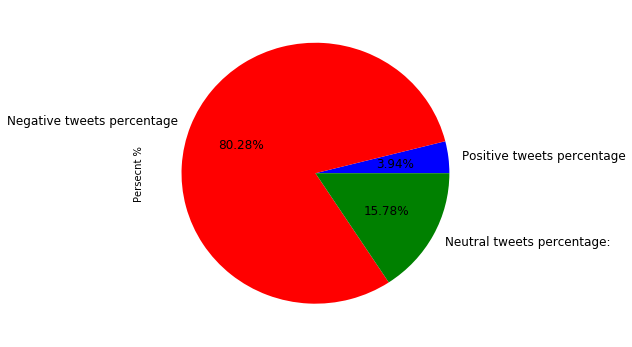

In [17]:
# Create a list of tweets fellings tags:
total_number_of_tweets_status = [len(ptweets),len(ntweets),(len(tweets) - len(ntweets) - len(ptweets))]

lables = ['Positive tweets percentage','Negative tweets percentage','Neutral tweets percentage:']
my_colors = 'brg'  #red, green, blue
"""
# The plot.pie does not allow negative values:
# we check if the neut_percetage is negative which usual is when the data sample is small.
# if so we use the abs() fucntion to convert the value to a positive and plot the pie chart
"""

if neut_percetage < 0:
    total_number_of_tweets_status[2] = abs(neut_percetage)
    print(total_number_of_tweets_status[0])
    series = pd.Series([pos_percetage,neg_percetage,neut_percetage], 
                   index=lables,
                   name='Persecnt %')
else:
    series = pd.Series(total_number_of_tweets_status,
                   index=lables,
                   name='Persecnt %')
#  Display Pie chart of the results:
series.plot.pie(fontsize=12, autopct='%.2f%%', figsize=(6, 6),colors=my_colors)

### The Pie Chart represent the data in its own way which differ than the above df table we have in the 
```python
display(tweets_status)
```

### Show a pie chart represention of the devices the tweet's was sent from. In our case IPhone vs. Android
The result is obtained from the
```python
 data_dic['source'] # dictionary
```

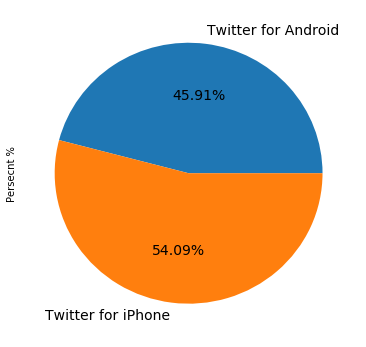

In [18]:
# create two lists to hold the data for each device
source_android = []
source_iphone = []

lables = ['Twitter for Android','Twitter for iPhone']
# loop over the source and only take IPhone or Android
for source in data_dic['source']:
    if source == 'Twitter for Android':
        source_android.append(source)
    elif source == 'Twitter for iPhone':
        source_iphone.append(source)

series = pd.Series([len(source_android),len(source_iphone)], 
                   index=lables, 
                   name='Persecnt %')
#  Display Pie chart:
series.plot.pie(fontsize=14, autopct='%.2f%%', figsize=(6, 6))

### Show the number of follwer VS. retweets VS. tweet lenght in a plot.

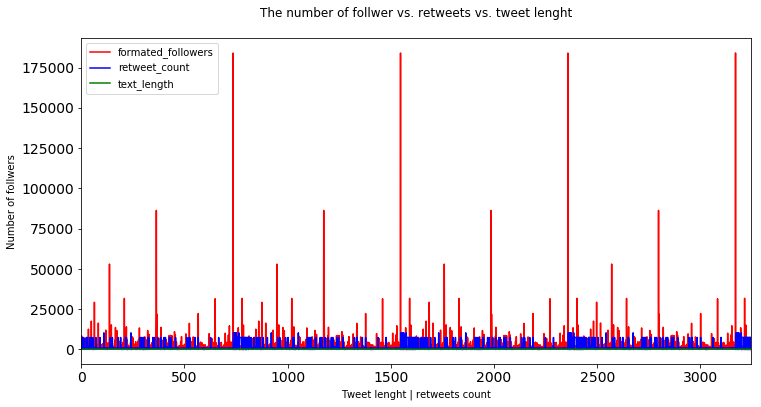

In [19]:
plt.figure()
my_colors = 'rbg'  #red, green ,color=my_colors
data_df.plot(fontsize=14,figsize=(12, 6),color=my_colors)
plt.title("The number of follwer vs. retweets vs. tweet lenght\n")
plt.ylabel("Number of follwers")
plt.xlabel("Tweet lenght | retweets count")
plt.show()

### Show each value in its own subplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11401e940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1148a2a58>], dtype=object)

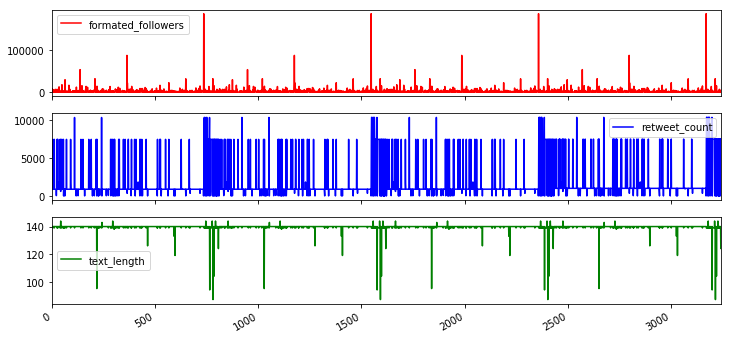

In [20]:
my_colors = 'rbg'  #red, green ,color=my_colors
data_df.plot(subplots=True, figsize=(12, 6),color=my_colors)

### Compare the retweet count VS. Number of followers

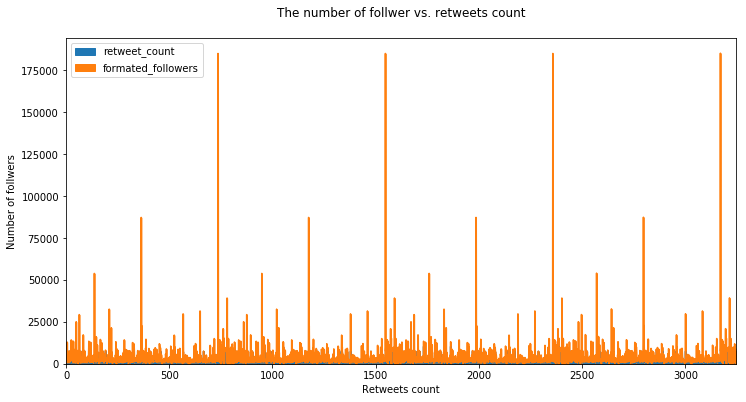

In [21]:
simplified_data = data_df[["retweet_count", "formated_followers"]] # extract retweet_count and formated_followers data for analysis and visualisation
plt.figure()
simplified_data.plot.area(figsize=(12,6));
plt.title("The number of follwer vs. retweets count\n")
plt.ylabel("Number of follwers")
plt.xlabel("Retweets count")
plt.show()

## Show the number of retweet's VS. number of followers

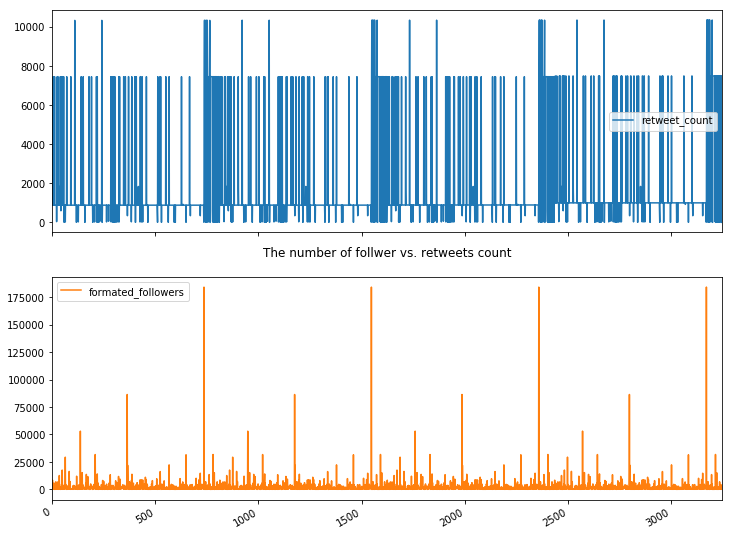

In [22]:
simplified_data = data_df[["retweet_count", "formated_followers"]] # extract retweet_count and formated_followers data for analysis and visualisation
plt.figure()
simplified_data.plot(subplots=True, figsize=(12, 10))
plt.title("The number of follwer vs. retweets count\n")
# plt.ylabel("Number of follwers")
# plt.xlabel("Retweets count")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114967ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110b6d550>]], dtype=object)

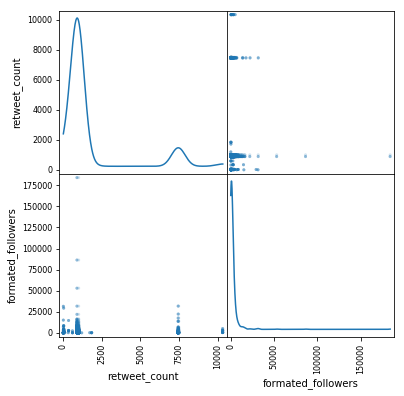

In [23]:
from pandas.plotting import scatter_matrix as scatter
scatter(simplified_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

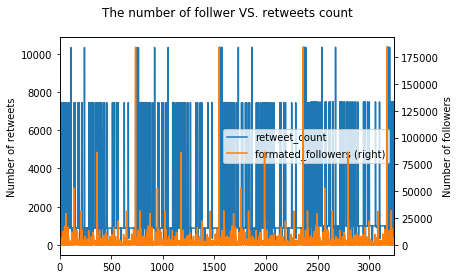

In [24]:
ax = simplified_data.plot(secondary_y=['formated_followers'])
ax.set_ylabel("Number of retweets")
ax.right_ax.set_ylabel("Number of followers")

plt.title("The number of follwer VS. retweets count\n")
plt.show()

In [25]:
import collections
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

### Download the stopwords package from the nltk_data if not donwloaded:

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohsenqaysi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(''.join(all_tweets))

stopWords = set(stopwords.words('english'))
wordsFiltered = []
for w in tokens:
    # Remove the RT and https tag which occureces in most tweets
    if w =='RT'or w == 'https' or w== 'the' or  w == 'The':
        pass
    elif w not in stopWords:
        wordsFiltered.append(w)
        
wordcount = collections.Counter(wordsFiltered)
# Find top 10 terms
df = pd.DataFrame(wordcount.most_common(10),
                   columns=['Word', 'Frequency']).set_index('Word')
df

,Frequency
Word,
failed,7727
FBI,3105
Despite,2577
MAJOR,2577
red,2577
flags,2577
Sheriff,2577
Department,2577
cowardly,2573


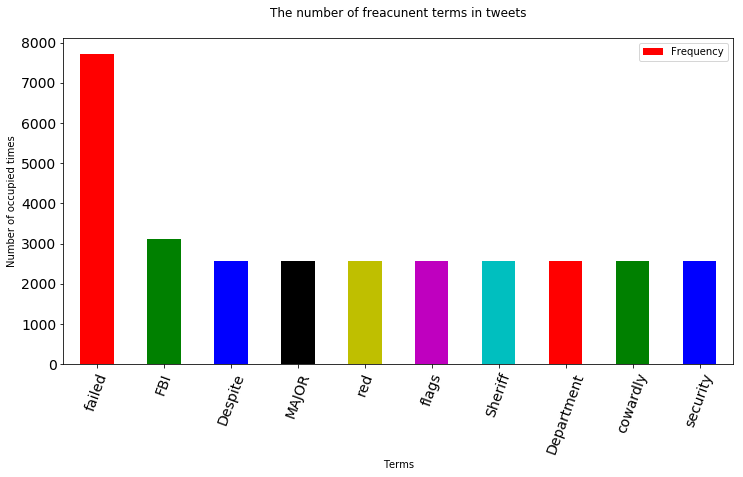

In [28]:
plt.figure()
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
df.plot.bar(fontsize=14,rot=70 ,figsize=(12,6),color=my_colors)
plt.title("The number of freacunent terms in tweets\n")
plt.ylabel("Number of occupied times")
plt.xlabel("Terms")
plt.show()

### Tentative Conclusion
Further in-depth studies and tests could be carried out to make statistically significant results. However, there doesn't seem to be much of a relationship between:
- The number of followers you have and the retweets you will get.
- The tweet contex (Positive, Negative or Neutral tweet) and the retweets it gets by followers.
- The number of IPhone users are greater most of the time. I am assuming most of the tweets are from the USA becuase I user the following key words ['Donald Trump','FBI']. Further analysis could be caried to verify that using the tweet place or Geo, but most users are disabled this feature.

Despiset the fact that not everyone agree or like the way Donald Trump go about doing things,
many people on social media also dislike him and the text mining and analysis proved that with over 80% of our data sample shows negative tweets.

###### Finally:
- We can see that many users uses phone devices to tweets, we can carry further analysis to find out the age range and gender to understand how they think and from where ther tweets(location: cofe shop, gym, etc)
- Further analysis can be done to pair the most freacunet terms/words in pair to see how the users feel about a certint topic or issue.
- Extract the most common terms from positive or negative and further understand the users emotions.